In [1]:
import os
from cloudmesh.common.Shell import Shell
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
from tqdm.notebook import tqdm
from cloudmesh.common.util import readfile
from cloudmesh.common.util import writefile
from cloudmesh.common.StopWatch import StopWatch 
from cloudmesh.common.systeminfo import systeminfo
import ipywidgets as widgets
from collections import OrderedDict

sns.set_theme(style="whitegrid")

In [2]:
data = OrderedDict()

In [3]:
a =  [("gregor", "alienware", 4), 
      ("gregor", "alienware", 8),
      ("gregor", "alienware", 16),
      ("gregor", "alienware", 32)]
i5 = [("gregor", "i5", 4), 
      ("gregor", "i5", 5),
      ("gregor", "i5", 6),
      ("gregor", "i5", 8),
      ("gregor", "i5", 10),
      ("gregor", "i5", 12)]

for user, node, processors in i5:

    label = f"{user}-{node}-{processors}"
    output = f"benchmark/{user}"

    df = pd.read_pickle(f"{output}/{label}-df.pkl")
    display(df)
    row = list(df.iloc[[-1]].values[0])
    print (processors, row)
    data[str(processors)] = row

Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
16,0.001,0.002,0.000,0.003,0.003,0.001,0.000,0.008,0.001,0.002
2560000,1.402,1.407,1.400,1.388,1.438,1.397,1.420,1.410,1.419,1.389
5120000,2.795,2.760,2.806,2.778,2.802,2.920,2.843,2.838,2.826,2.821
7680000,4.244,4.172,4.245,4.209,4.186,4.179,4.196,4.150,4.261,4.229
10240000,5.653,5.657,5.614,5.645,5.590,5.784,5.605,5.585,5.631,5.598
12800000,7.016,7.111,6.966,7.331,6.996,6.999,6.963,7.020,7.039,6.987
15360000,8.422,8.479,8.350,8.902,8.530,8.314,8.379,8.347,8.451,8.320
17920000,9.910,9.792,9.838,9.970,10.007,9.799,9.759,9.887,10.088,9.921
20480000,11.361,11.179,11.230,11.051,11.116,11.224,11.077,11.082,11.121,11.274


4 [12.535, 12.679, 12.527, 12.57, 12.86, 12.672, 12.623, 12.835, 12.543, 12.66]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
12,0.002,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001
2048000,1.139,1.157,1.140,1.166,1.141,1.146,1.203,1.139,1.131,1.144
4096000,2.287,2.315,2.297,2.353,2.321,2.256,2.272,2.261,2.296,2.274
6144000,3.441,3.431,3.485,3.502,3.414,3.452,3.426,3.515,3.638,3.435
8192000,4.540,4.528,4.540,4.690,4.563,4.564,4.553,4.558,4.576,4.617
10240000,5.710,5.784,5.769,5.778,5.682,5.703,5.654,5.696,5.680,5.757
12288000,6.946,7.113,6.967,6.774,6.783,6.920,6.784,6.789,6.845,6.784
14336000,7.949,7.985,8.246,7.989,8.232,7.972,7.941,7.963,8.114,7.954
16384000,9.054,9.170,9.421,9.017,9.126,9.245,9.050,9.230,9.158,9.180


5 [10.131, 10.546, 10.322, 10.212, 10.248, 10.262, 10.495, 10.201, 10.269, 10.162]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
10,0.000,0.001,0.000,0.000,0.000,0.065,0.031,0.008,0.000,0.005
1706666,0.964,0.952,0.952,1.134,0.965,0.948,0.950,0.951,0.950,0.952
3413333,1.894,1.897,1.906,1.880,1.883,1.901,1.943,1.898,1.925,1.909
5120000,2.846,2.912,2.974,2.859,2.846,2.874,2.864,2.889,2.851,2.892
6826666,4.107,3.935,3.804,3.832,3.839,3.951,3.837,3.843,3.766,3.808
8533333,4.717,4.786,4.718,4.764,4.820,4.798,4.763,4.842,4.766,5.206
10240000,5.693,5.725,5.759,5.705,5.854,5.792,5.686,5.756,5.706,5.952
11946666,6.660,6.831,6.817,6.672,6.958,6.730,6.753,6.736,6.822,6.658
13653333,7.594,7.767,7.619,7.614,7.544,7.623,7.525,7.536,7.570,7.664


6 [8.516, 8.544, 8.667, 8.718, 8.552, 8.529, 8.719, 8.546, 8.716, 8.645]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
8,0.022,0.087,0.000,0.000,0.000,0.000,0.000,0.086,0.000,0.000
1280000,1.445,1.450,1.476,1.461,1.439,1.450,1.457,1.444,1.450,1.467
2560000,2.913,2.892,2.918,2.916,2.894,2.927,2.903,2.914,2.904,2.906
3840000,4.363,4.427,4.374,4.381,4.383,4.324,4.353,4.373,4.515,4.450
5120000,5.846,5.884,5.966,5.812,5.779,5.787,5.847,5.783,5.844,5.810
6400000,7.365,7.248,7.257,7.437,7.267,7.354,7.274,7.444,7.291,7.322
7680000,8.713,8.747,8.706,8.776,8.992,8.799,8.815,8.651,8.830,8.834
8960000,10.074,10.146,10.072,10.173,10.246,10.195,10.271,10.209,10.215,10.127
10240000,11.537,11.823,11.819,11.689,11.640,11.626,11.673,11.653,11.658,11.737


8 [13.21, 13.21, 13.03, 13.036, 13.146, 13.179, 13.119, 13.311, 13.192, 13.12]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
6,0.001,0.000,0.000,0.002,0.001,0.000,0.001,0.003,0.001,0.001
1024000,1.178,1.171,1.190,1.182,1.247,1.193,1.166,1.167,1.178,1.173
2048000,2.348,2.325,2.360,2.348,2.331,2.348,2.342,2.322,2.440,2.339
3072000,3.477,3.632,3.478,3.579,3.536,3.512,3.505,3.576,3.507,3.526
4096000,4.772,4.663,4.674,4.711,4.802,4.704,4.688,4.721,4.674,4.684
5120000,5.826,5.814,5.934,5.850,5.867,5.824,5.898,5.856,5.940,5.815
6144000,7.003,7.108,7.042,6.993,7.028,7.002,7.107,7.130,7.046,7.081
7168000,8.223,8.183,8.214,8.164,8.105,8.262,8.295,8.344,8.166,8.156
8192000,9.462,9.457,9.444,9.441,9.323,9.364,9.502,9.602,9.428,9.364


10 [10.517, 10.527, 10.548, 10.54, 10.464, 10.627, 10.535, 10.485, 10.605, 10.581]


Time,Time_0,Time_1,Time_2,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9
Size,,,,,,,,,,
5,0.002,0.001,0.002,0.000,0.000,0.000,0.000,0.001,0.000,0.004
853333,0.996,0.985,0.984,0.978,0.990,0.984,0.984,0.993,0.981,0.993
1706666,1.988,1.975,1.979,1.970,2.003,1.975,1.968,1.979,1.991,2.014
2560000,2.983,2.967,2.955,2.958,2.971,2.940,2.990,2.968,2.998,2.978
3413333,3.996,3.944,3.923,3.989,3.965,3.954,3.933,3.916,3.937,3.946
4266666,4.950,4.924,5.096,4.948,4.964,4.944,5.028,4.938,4.962,4.907
5120000,5.936,5.909,5.966,5.900,5.996,5.923,6.006,5.895,5.961,6.008
5973333,7.267,6.898,6.921,7.094,6.900,6.884,6.861,6.903,6.945,6.913
6826666,7.875,7.960,7.964,7.831,7.902,7.915,7.939,7.973,7.907,8.022


12 [9.071, 8.997, 8.908, 8.858, 8.946, 8.975, 8.927, 8.885, 9.212, 8.88]


In [4]:
result = pd.DataFrame(data)
result.index.name = "Trial"
result

,4,5,6,8,10,12
Trial,,,,,,
0,12.535,10.131,8.516,13.210,10.517,9.071
1,12.679,10.546,8.544,13.210,10.527,8.997
2,12.527,10.322,8.667,13.030,10.548,8.908
3,12.570,10.212,8.718,13.036,10.540,8.858
4,12.860,10.248,8.552,13.146,10.464,8.946
5,12.672,10.262,8.529,13.179,10.627,8.975
6,12.623,10.495,8.719,13.119,10.535,8.927
7,12.835,10.201,8.546,13.311,10.485,8.885
8,12.543,10.269,8.716,13.192,10.605,9.212


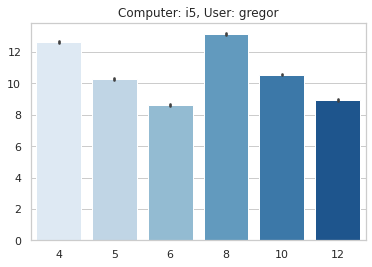

In [5]:
#sns.boxplot(data=result);
#sns.swarmplot(data=result);
sns.barplot(data=result, palette="Blues").set_title(f'Computer: {node}, User: {user}');



In [6]:
result.describe()

,4,5,6,8,10,12
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12.650400,10.284800,8.615200,13.155300,10.542900,8.965900
std,0.118641,0.136208,0.085763,0.084799,0.050529,0.107232
min,12.527000,10.131000,8.516000,13.030000,10.464000,8.858000
25%,12.549750,10.203750,8.544500,13.119250,10.519500,8.890750
50%,12.641500,10.255000,8.598500,13.162500,10.537500,8.936500
75%,12.677250,10.308750,8.703750,13.205500,10.572750,8.991500
max,12.860000,10.546000,8.719000,13.311000,10.627000,9.212000


In [7]:
df_line = pd.DataFrame({
    "Processors": list(result.columns),
    "Time in s": list(result.describe(include='all').loc['mean'])           
                 })
df_line["Processors"] = pd.to_numeric(df_line["Processors"])


In [8]:
df_line["Sum"] = df_line["Time in s"] * df_line["Processors"]
df_line

,Processors,Time in s,Sum
0,4,12.6504,50.6016
1,5,10.2848,51.4240
2,6,8.6152,51.6912
3,8,13.1553,105.2424
4,10,10.5429,105.4290
5,12,8.9659,107.5908


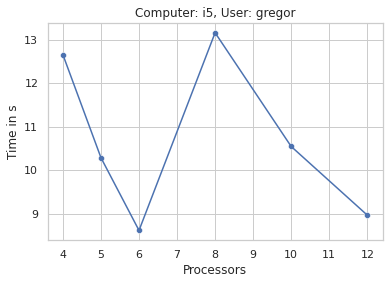

In [9]:
sns.scatterplot(data=df_line, x="Processors", y="Time in s");
sns.lineplot(data=df_line, x="Processors", y="Time in s").set_title(f'Computer: {node}, User: {user}');